In [1]:
#### Read Inputs #### 

import pandas as pd
import numpy as np
import random
import math
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
from datetime import date, timedelta

# Model (with month weights), iteratively trained, tested on testing dataset

In [189]:

# Because of the model runtime, split up the running of the code between all group members.
# Hence, we have multiple CSV files to combine for our full data.

output = pd.read_csv('!day 319.csv')
output2 = pd.read_csv('!day 369.csv')
output3 = pd.read_csv('!day 384.csv')
output4 = pd.read_csv('!day 404.csv')
output5 = pd.read_csv('!day 424.csv')
output6 = pd.read_csv('!day 457.csv')
output = pd.concat([output, output2]).reset_index(drop = True)
output = pd.concat([output, output3]).reset_index(drop = True)
output = pd.concat([output, output4]).reset_index(drop = True)
output = pd.concat([output, output5]).reset_index(drop = True)
output = pd.concat([output, output6]).reset_index(drop = True)
output = output.rename(columns={"total_loss": "Hiring cost + Loss from undetected scams", "gain_value": "Value of detected scams"})
output["test_day"] += 305
output

,test_day,Value of detected scams,loss_value_scams,Hiring cost + Loss from undetected scams,prio1_det,prio2_det,prio3_det,prio4_det,prio1_undet,prio2_undet,...,bank_A_loss_scams,bank_B_loss_scams,bank_C_loss_scams,bank_D_loss_scams,bank_E_loss_scams,bank_A_loss_scams_ext,bank_B_loss_scams_ext,bank_C_loss_scams_ext,bank_D_loss_scams_ext,bank_E_loss_scams_ext
0,305.0,11756.00,812.70,1412.70,2.0,2.0,5.0,0.0,4.0,2.0,...,289.75,85.30,91.50,207.35,138.80,339.75,185.30,241.50,207.35,438.80
1,306.0,6231.05,565.35,1115.35,5.0,0.0,2.0,2.0,3.0,1.0,...,431.30,40.40,47.45,0.00,46.20,431.30,190.40,297.45,0.00,196.20
2,307.0,1668.70,728.35,728.35,3.0,0.0,0.0,1.0,4.0,2.0,...,191.10,262.35,102.20,83.85,88.85,191.10,262.35,102.20,83.85,88.85
3,308.0,2998.85,522.30,522.30,2.0,0.0,2.0,0.0,4.0,2.0,...,0.00,51.60,0.00,133.65,337.05,0.00,51.60,0.00,133.65,337.05
4,309.0,353.55,249.55,249.55,2.0,2.0,0.0,0.0,2.0,0.0,...,0.00,0.00,0.00,249.55,0.00,0.00,0.00,0.00,249.55,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,453.0,176.15,196.10,196.10,0.0,0.0,1.0,0.0,5.0,0.0,...,36.25,118.30,0.00,0.00,41.55,36.25,118.30,0.00,0.00,41.55
149,454.0,188.90,684.75,684.75,4.0,0.0,0.0,0.0,3.0,3.0,...,106.40,344.75,20.15,120.70,92.75,106.40,344.75,20.15,120.70,92.75
150,455.0,37.10,624.60,624.60,1.0,0.0,0.0,0.0,1.0,1.0,...,412.60,0.00,0.00,35.80,176.20,412.60,0.00,0.00,35.80,176.20
151,456.0,754.90,568.75,568.75,0.0,0.0,1.0,0.0,4.0,1.0,...,43.15,180.35,178.95,0.00,166.30,43.15,180.35,178.95,0.00,166.30


In [332]:
start_date = date(2023, 10, 1)
end_date = date(2025, 1, 1)
days = list(range(0,458, 1))
dates = pd.date_range(start_date,end_date-timedelta(days=1),freq='d')
date_dicts = dict(zip(days, dates))
output["Date"] = output["test_day"].map(date_dicts)
output.loc[output["Value of detected scams"] >= 8000]
sum(output["Hiring cost + Loss from undetected scams"] - output["loss_value_scams"])

1900.0

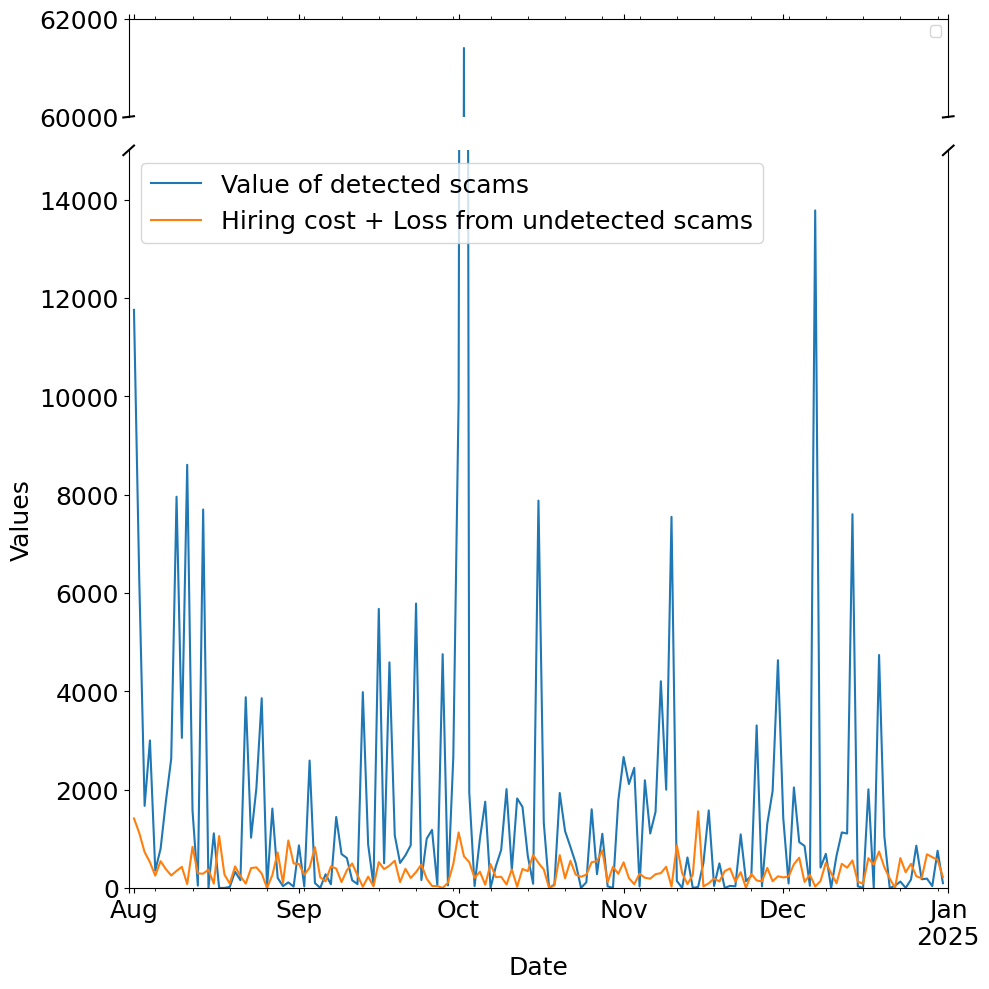

In [197]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True, gridspec_kw={'height_ratios': [2, 15]})

# First subplot. Zoomed-in y-axis
output.plot(x="Date", y=["Value of detected scams", "Hiring cost + Loss from undetected scams"], ax=axes[0], label=["Value of detected scams", "Hiring cost + Loss from undetected scams"])
axes[0].set_ylabel("")
axes[0].set_ylim(60000, 62000) 
axes[0].yaxis.set_major_locator(MultipleLocator(2000))  # Set y-axis ticks at intervals of 2000
axes[0].legend([])

# Plotting the second subplot. Zoomed-in y-axis
output.plot(x="Date", y=["Value of detected scams", "Hiring cost + Loss from undetected scams"], ax=axes[1], label=["Value of detected scams", "Hiring cost + Loss from undetected scams"])
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Values")
axes[1].set_ylim(0, 15000)  # Adjust the limits as needed for your data
axes[1].legend()  # Provide an empty list to remove the legend

# Hide spines and ticks in the second subplot
axes[0].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[0].xaxis.tick_top()
axes[0].tick_params(labeltop=False)  # Don't put tick labels at the top
axes[1].xaxis.tick_bottom()

# Set font size for various elements
font_size = 18  # Adjust the font size as needed
for ax in axes:
    ax.tick_params(axis='both', labelsize=font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize=font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize=font_size)

axes[1].legend(fontsize=font_size)

# Add diagonal lines to indicate the break between subplots
d = .0065  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=axes[0].transAxes, color='k', clip_on=False)
axes[0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
axes[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=axes[1].transAxes)  # switch to the bottom axes
axes[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
axes[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

axes[1].set_xlim(pd.to_datetime('2024-07-31'), pd.to_datetime('2025-01-01'))
axes[0].set_xlim(pd.to_datetime('2024-07-31'), pd.to_datetime('2025-01-01'))

# Show the plot
plt.tight_layout()
plt.savefig("1out Day-by-day; Model with weights on month bins.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [236]:
total_saved = sum(output["Value of detected scams"])
total_lost = sum(output["Hiring cost + Loss from undetected scams"])

value = total_saved
row15 = total_lost + total_saved - 350328.25
row18 = total_lost

row2 = 350328.25
losses_cut = 1 - total_lost/350328.25
saved_prop = pd.DataFrame([row2, value, row15, row18,  losses_cut])
saved_prop.iloc[0] = saved_prop.iloc[0].apply(lambda x: "+ £{:.2f}".format(x))
saved_prop.iloc[1] = saved_prop.iloc[1].apply(lambda x: "- £{:.2f}".format(x))
saved_prop.iloc[2] = saved_prop.iloc[2].apply(lambda x: "+ £{:.2f}".format(x))
saved_prop.iloc[3] = saved_prop.iloc[3].apply(lambda x: "+ £{:.2f}".format(x))
saved_prop.iloc[4] = saved_prop.iloc[4].apply(lambda x: "{:.2f}\%".format(x * 100))
saved_prop["Index"] = ["Theoretical Max loss (no investigations)", "Our Detected Scams", "Hiring cost", "Total" , "Proportion of Losses cut"]
saved_prop = saved_prop.set_index("Index")
saved_prop.index.name = None
saved_prop.columns = ["Loss"]
display(saved_prop)
print(saved_prop.to_latex())

,Loss
Theoretical Max loss (no investigations),+ £350328.25
Our Detected Scams,- £298387.10
Hiring cost,+ £1900.00
Total,+ £53841.15
Proportion of Losses cut,84.63\%


\begin{tabular}{ll}
\toprule
 & Loss \\
\midrule
Theoretical Max loss (no investigations) & + £350328.25 \\
Our Detected Scams & - £298387.10 \\
Hiring cost & + £1900.00 \\
Total & + £53841.15 \\
Proportion of Losses cut & 84.63\% \\
\bottomrule
\end{tabular}



In [196]:
counts = output.iloc[:,4:12].sum(axis=0)
diction_rate = {"Transaction Priority": [1,2,3,4],
                "Investigation Success Rate": [counts[0]/(counts[0] + counts[4]), 
                                               counts[1]/(counts[1] + counts[5]), 
                                               counts[2]/(counts[2] + counts[6]),
                                               counts[3]/(counts[3] + counts[7])]}
success_rate_df = pd.DataFrame.from_dict(diction_rate)
success_rate_df["Investigation Success Rate"] = success_rate_df["Investigation Success Rate"].apply(lambda x: "{:.2f}\%".format(x * 100))
display(success_rate_df)
print(success_rate_df.to_latex(index = False))

,Transaction Priority,Investigation Success Rate
0,1,42.62\%
1,2,12.62\%
2,3,61.21\%
3,4,41.18\%


\begin{tabular}{rl}
\toprule
Transaction Priority & Investigation Success Rate \\
\midrule
1 & 42.62\% \\
2 & 12.62\% \\
3 & 61.21\% \\
4 & 41.18\% \\
\bottomrule
\end{tabular}



In [193]:
more_counts = output.iloc[:,11:19].sum(axis=0)
false_positive_counts = sum(more_counts[0:4])
true_negative_counts = sum(more_counts[4:8])
true_positive_counts = sum(counts[0:4])
false_negative_counts = sum(counts[4:8])

table = pd.DataFrame([[true_positive_counts, false_positive_counts], [false_negative_counts, true_negative_counts]], columns= ["Fraud", "Not Fraud"])
table["Total"] = table.sum(axis=1)
table.loc[len(table)] = table.sum(axis=0)
table["Index"] = np.array(["Investigated", "Not investigated", "Total"])
table = table.set_index("Index")
table.index.name = None
table = table.astype(int)
display(table)
print(table.to_latex())

,Fraud,Not Fraud,Total
Investigated,432,12261,12693
Not investigated,573,108575,109148
Total,1006,120836,121842


\begin{tabular}{lrrr}
\toprule
 & Fraud & Not Fraud & Total \\
\midrule
Investigated & 432 & 12261 & 12693 \\
Not investigated & 573 & 108575 & 109148 \\
Total & 1006 & 120836 & 121842 \\
\bottomrule
\end{tabular}



# Retroactively applying fully-trained model over whole dataset

## Model with weights on month

In [237]:
trained = pd.read_csv('!full model with month weights.csv')
trained = trained.rename(columns={"total_loss": "Hiring cost + Loss from undetected scams", "gain_value": "Value of detected scams"})
start_date = date(2023, 10, 1)
end_date = date(2025, 1, 1)
days = list(range(0,458, 1))
dates = pd.date_range(start_date,end_date-timedelta(days=1),freq='d')
date_dicts = dict(zip(days, dates))
trained["Date"] = trained["test_day"].map(date_dicts)

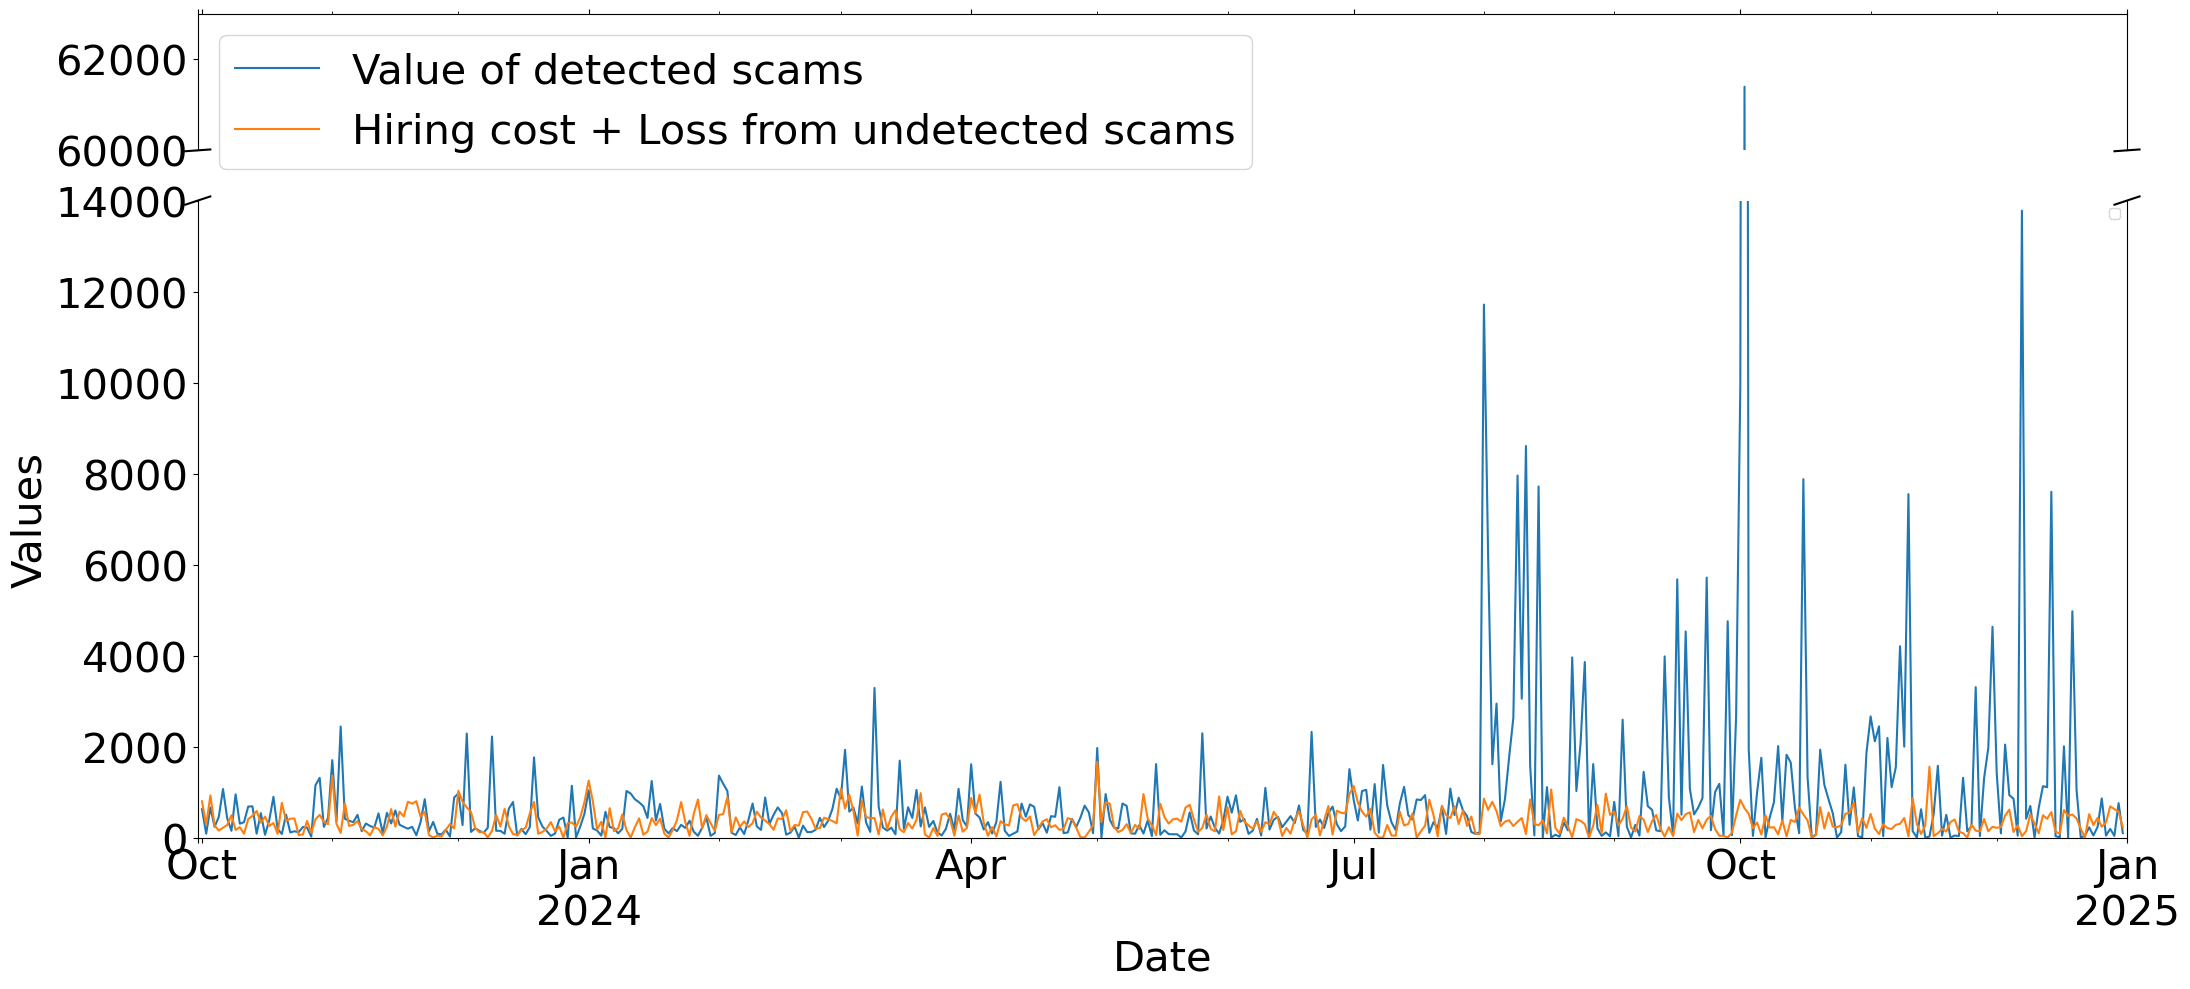

In [259]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(22, 10), sharex=True, gridspec_kw={'height_ratios': [1.5, 7]})

# First subplot. Zoomed-in y-axis
trained.plot(x="Date", y=["Value of detected scams", "Hiring cost + Loss from undetected scams"], ax=axes[0], label=["Value of detected scams", "Hiring cost + Loss from undetected scams"])
axes[0].set_ylabel("")
axes[0].set_ylim(60000, 63000) 
axes[0].yaxis.set_major_locator(MultipleLocator(2000))  # Set y-axis ticks at intervals of 2000
axes[0].legend()

# Plotting the second subplot. Zoomed-in y-axis
trained.plot(x="Date", y=["Value of detected scams", "Hiring cost + Loss from undetected scams"], ax=axes[1], label=["Value of detected scams", "Hiring cost + Loss from undetected scams"])
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Values")
axes[1].set_ylim(0, 14000)  # Adjust the limits as needed for your data
axes[1].legend([])  # Provide an empty list to remove the legend

# Hide spines and ticks in the second subplot
axes[0].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[0].xaxis.tick_top()
axes[0].tick_params(labeltop=False)  # Don't put tick labels at the top
axes[1].xaxis.tick_bottom()

# Set font size for various elements
font_size = 30  # Adjust the font size as needed
for ax in axes:
    ax.tick_params(axis='both', labelsize=font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize=font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize=font_size)

axes[0].legend(fontsize=font_size)

# Add diagonal lines to indicate the break between subplots
d = .0065  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=axes[0].transAxes, color='k', clip_on=False)
axes[0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
axes[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=axes[1].transAxes)  # switch to the bottom axes
axes[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
axes[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


axes[1].set_xlim(pd.to_datetime('2023-09-30'), pd.to_datetime('2025-01-01'))
axes[0].set_xlim(pd.to_datetime('2023-09-30'), pd.to_datetime('2025-01-01'))

# Show the plot
plt.tight_layout()
plt.savefig("2out Post-training; Model with weights on month bins.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [102]:
total_saved = sum(trained["Value of detected scams"])
total_lost = sum(trained["Hiring cost + Loss from undetected scams"])
row1 = [total_saved, total_lost]
row2 = [total_saved/(total_saved + total_lost)*100, total_lost/(total_saved+total_lost)*100]
saved_prop = pd.DataFrame([row1, row2])
saved_prop.iloc[0] = saved_prop.iloc[0].apply(lambda x: "£{:.2f}".format(x))
saved_prop.iloc[1] = saved_prop.iloc[1].apply(lambda x: "{:.2f}\%".format(x))
saved_prop["Index"] = ["Total £", "Proportion"]
saved_prop = saved_prop.set_index("Index")
saved_prop.index.name = None
saved_prop.columns = ["Money saved", "Money spent"]
display(saved_prop)
print(saved_prop.to_latex())

,Money saved,Money spent
Total £,£441592.55,£162176.10
Proportion,73.14\%,26.86\%


\begin{tabular}{lll}
\toprule
 & Money saved & Money spent \\
\midrule
Total £ & £441592.55 & £162176.10 \\
Proportion & 73.14\% & 26.86\% \\
\bottomrule
\end{tabular}



In [239]:
total_saved = sum(trained["Value of detected scams"])
total_lost = sum(trained["Hiring cost + Loss from undetected scams"])

value = total_saved
row15 = total_lost + total_saved - 603468.65
row18 = total_lost

row2 = 603468.65
losses_cut = 1 - total_lost/603468.65
saved_prop = pd.DataFrame([row2, value, row15, row18,  losses_cut])
saved_prop.iloc[0] = saved_prop.iloc[0].apply(lambda x: "- £{:.2f}".format(x))
saved_prop.iloc[1] = saved_prop.iloc[1].apply(lambda x: "+ £{:.2f}".format(x))
saved_prop.iloc[2] = saved_prop.iloc[2].apply(lambda x: "- £{:.2f}".format(x))
saved_prop.iloc[3] = saved_prop.iloc[3].apply(lambda x: "- £{:.2f}".format(x))
saved_prop.iloc[4] = saved_prop.iloc[4].apply(lambda x: "{:.2f}\%".format(x * 100))
saved_prop["Index"] = ["Theoretical Max loss (no investigations)", "Our Detected Scams", "Hiring cost", "Total" , "Proportion of Losses cut"]
saved_prop = saved_prop.set_index("Index")
saved_prop.index.name = None
saved_prop.columns = ["Loss"]
display(saved_prop)
print(saved_prop.to_latex())

,Loss
Theoretical Max loss (no investigations),- £603468.65
Our Detected Scams,+ £441592.55
Hiring cost,- £300.00
Total,- £162176.10
Proportion of Losses cut,73.13\%


\begin{tabular}{ll}
\toprule
 & Loss \\
\midrule
Theoretical Max loss (no investigations) & - £603468.65 \\
Our Detected Scams & + £441592.55 \\
Hiring cost & - £300.00 \\
Total & - £162176.10 \\
Proportion of Losses cut & 73.13\% \\
\bottomrule
\end{tabular}



In [52]:
counts = trained.iloc[:,4:12].sum(axis=0)
diction_rate = {"Transaction Priority": [1,2,3,4],
                "Investigation Success Rate": [counts[0]/(counts[0] + counts[4]), 
                                               counts[1]/(counts[1] + counts[5]), 
                                               counts[2]/(counts[2] + counts[6]),
                                               counts[3]/(counts[3] + counts[7])]}
success_rate_df = pd.DataFrame.from_dict(diction_rate)
success_rate_df["Investigation Success Rate"] = success_rate_df["Investigation Success Rate"].apply(lambda x: "{:.2f}\%".format(x * 100))
display(success_rate_df)
print(success_rate_df.to_latex(index = False))

,Transaction Priority,Investigation Success Rate
0,1,53.15\%
1,2,27.46\%
2,3,54.22\%
3,4,38.28\%


\begin{tabular}{rl}
\toprule
Transaction Priority & Investigation Success Rate \\
\midrule
1 & 53.15\% \\
2 & 27.46\% \\
3 & 54.22\% \\
4 & 38.28\% \\
\bottomrule
\end{tabular}



In [53]:
more_counts = trained.iloc[:,12:20].sum(axis=0)
false_positive_counts = sum(more_counts[0:4])
true_negative_counts = sum(more_counts[4:8])
true_positive_counts = sum(counts[0:4])
false_negative_counts = sum(counts[4:8])

table = pd.DataFrame([[true_positive_counts, false_positive_counts], [false_negative_counts, true_negative_counts]], columns= ["Fraud", "Not Fraud"])
table["Total"] = table.sum(axis=1)
table.loc[len(table)] = table.sum(axis=0)
table["Index"] = np.array(["Investigated", "Not investigated", "Total"])
table = table.set_index("Index")
table.index.name = None
table = table.astype(int)
display(table)
print(table.to_latex())

,Fraud,Not Fraud,Total
Investigated,1706,30998,32704
Not investigated,1781,327194,328975
Total,3487,358192,361679


\begin{tabular}{lrrr}
\toprule
 & Fraud & Not Fraud & Total \\
\midrule
Investigated & 1706 & 30998 & 32704 \\
Not investigated & 1781 & 327194 & 328975 \\
Total & 3487 & 358192 & 361679 \\
\bottomrule
\end{tabular}



In [295]:
trained = trained.iloc[:305, :]

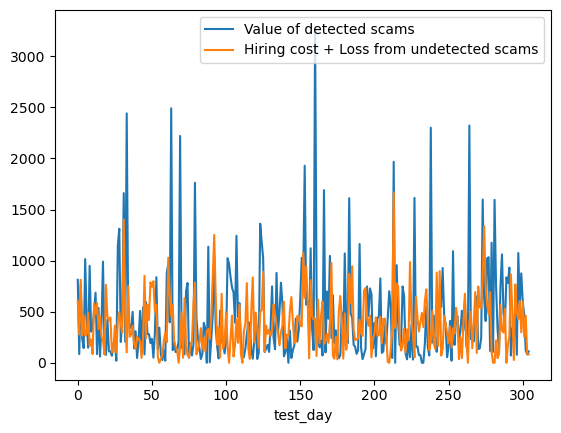

,Money saved,Money lost
Total £,£139545.60,£113594.80
Proportion,55.13\%,44.87\%


\begin{tabular}{lll}
\toprule
 & Money saved & Money lost \\
\midrule
Total £ & £139545.60 & £113594.80 \\
Proportion & 55.13\% & 44.87\% \\
\bottomrule
\end{tabular}



,Transaction Priority,Investigation Success Rate
0,1,53.80\%
1,2,31.28\%
2,3,48.71\%
3,4,34.75\%


\begin{tabular}{rl}
\toprule
Transaction Priority & Investigation Success Rate \\
\midrule
1 & 53.80\% \\
2 & 31.28\% \\
3 & 48.71\% \\
4 & 34.75\% \\
\bottomrule
\end{tabular}



,Fraud,Not Fraud,Total
Investigated,1206,18479,19685
Not investigated,1275,217197,218472
Total,2481,235676,238157


\begin{tabular}{lrrr}
\toprule
 & Fraud & Not Fraud & Total \\
\midrule
Investigated & 1206 & 18479 & 19685 \\
Not investigated & 1275 & 217197 & 218472 \\
Total & 2481 & 235676 & 238157 \\
\bottomrule
\end{tabular}



In [296]:
plot = trained.plot(x = "test_day", y = ["Value of detected scams", "Hiring cost + Loss from undetected scams"])
plt.savefig("Post-training; Model with weights on month bins.pdf", format = "pdf", bbox_inches = "tight")
plt.show()
total_saved = sum(trained["Value of detected scams"])
total_lost = sum(trained["Hiring cost + Loss from undetected scams"])
row1 = [total_saved, total_lost]
row2 = [total_saved/(total_saved + total_lost)*100, total_lost/(total_saved+total_lost)*100]
saved_prop = pd.DataFrame([row1, row2])
saved_prop.iloc[0] = saved_prop.iloc[0].apply(lambda x: "£{:.2f}".format(x))
saved_prop.iloc[1] = saved_prop.iloc[1].apply(lambda x: "{:.2f}\%".format(x))
saved_prop["Index"] = ["Total £", "Proportion"]
saved_prop = saved_prop.set_index("Index")
saved_prop.index.name = None
saved_prop.columns = ["Money saved", "Money spent"]
display(saved_prop)
print(saved_prop.to_latex())
counts = trained.iloc[:,3:11].sum(axis=0)
diction_rate = {"Transaction Priority": [1,2,3,4],
                "Investigation Success Rate": [counts[0]/(counts[0] + counts[4]), 
                                               counts[1]/(counts[1] + counts[5]), 
                                               counts[2]/(counts[2] + counts[6]),
                                               counts[3]/(counts[3] + counts[7])]}
success_rate_df = pd.DataFrame.from_dict(diction_rate)
success_rate_df["Investigation Success Rate"] = success_rate_df["Investigation Success Rate"].apply(lambda x: "{:.2f}\%".format(x * 100))
display(success_rate_df)
print(success_rate_df.to_latex(index = False))
more_counts = trained.iloc[:,11:19].sum(axis=0)
false_positive_counts = sum(more_counts[0:4])
true_negative_counts = sum(more_counts[4:8])
true_positive_counts = sum(counts[0:4])
false_negative_counts = sum(counts[4:8])

table = pd.DataFrame([[true_positive_counts, false_positive_counts], [false_negative_counts, true_negative_counts]], columns= ["Fraud", "Not Fraud"])
table["Total"] = table.sum(axis=1)
table.loc[len(table)] = table.sum(axis=0)
table["Index"] = np.array(["Investigated", "Not investigated", "Total"])
table = table.set_index("Index")
table.index.name = None
table = table.astype(int)
display(table)
print(table.to_latex())

## Model with no weights on month

In [303]:
trained2 = pd.read_csv('!full model without month weights.csv')
trained2 = trained2.rename(columns={"total_loss": "Hiring cost + Loss from undetected scams", "gain_value": "Value of detected scams"})

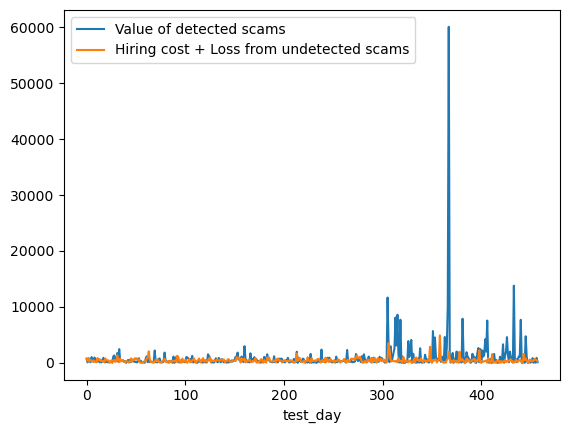

In [304]:

plot = trained2.plot(x = "test_day", y = ["Value of detected scams", "Hiring cost + Loss from undetected scams"])
plt.savefig("Day-by-day; Model with weights on month bins.pdf", format = "pdf", bbox_inches = "tight")

In [301]:
total_saved = sum(trained2["Value of detected scams"])
total_lost = sum(trained2["Hiring cost + Loss from undetected scams"])
row1 = [total_saved, total_lost]
row2 = [total_saved/(total_saved + total_lost)*100, total_lost/(total_saved+total_lost)*100]
saved_prop = pd.DataFrame([row1, row2])
saved_prop.iloc[0] = saved_prop.iloc[0].apply(lambda x: "£{:.2f}".format(x))
saved_prop.iloc[1] = saved_prop.iloc[1].apply(lambda x: "{:.2f}\%".format(x))
saved_prop["Index"] = ["Total £", "Proportion"]
saved_prop = saved_prop.set_index("Index")
saved_prop.index.name = None
saved_prop.columns = ["Money saved", "Money spent"]
display(saved_prop)
print(saved_prop.to_latex())

,Money saved,Money lost
Total £,£131842.15,£121448.25
Proportion,52.05\%,47.95\%


\begin{tabular}{lll}
\toprule
 & Money saved & Money lost \\
\midrule
Total £ & £131842.15 & £121448.25 \\
Proportion & 52.05\% & 47.95\% \\
\bottomrule
\end{tabular}



In [302]:
counts = trained2.iloc[:,3:11].sum(axis=0)
diction_rate = {"Transaction Priority": [1,2,3,4],
                "Investigation Success Rate": [counts[0]/(counts[0] + counts[4]), 
                                               counts[1]/(counts[1] + counts[5]), 
                                               counts[2]/(counts[2] + counts[6]),
                                               counts[3]/(counts[3] + counts[7])]}
success_rate_df = pd.DataFrame.from_dict(diction_rate)
success_rate_df["Investigation Success Rate"] = success_rate_df["Investigation Success Rate"].apply(lambda x: "{:.2f}\%".format(x * 100))
display(success_rate_df)
print(success_rate_df.to_latex(index = False))

,Transaction Priority,Investigation Success Rate
0,1,49.35\%
1,2,29.41\%
2,3,46.99\%
3,4,31.91\%


\begin{tabular}{rl}
\toprule
Transaction Priority & Investigation Success Rate \\
\midrule
1 & 49.35\% \\
2 & 29.41\% \\
3 & 46.99\% \\
4 & 31.91\% \\
\bottomrule
\end{tabular}



In [280]:
more_counts = trained.iloc[:,11:19].sum(axis=0)
false_positive_counts = sum(more_counts[0:4])
true_negative_counts = sum(more_counts[4:8])
true_positive_counts = sum(counts[0:4])
false_negative_counts = sum(counts[4:8])

table = pd.DataFrame([[true_positive_counts, false_positive_counts], [false_negative_counts, true_negative_counts]], columns= ["Fraud", "Not Fraud"])
table["Total"] = table.sum(axis=1)
table.loc[len(table)] = table.sum(axis=0)
table["Index"] = np.array(["Investigated", "Not investigated", "Total"])
table = table.set_index("Index")
table.index.name = None
table = table.astype(int)
display(table)
print(table.to_latex())

,Fraud,Not Fraud,Total
Investigated,1519,30257,31776
Not investigated,1968,327936,329904
Total,3487,358193,361680


\begin{tabular}{lrrr}
\toprule
 & Fraud & Not Fraud & Total \\
\midrule
Investigated & 1519 & 30257 & 31776 \\
Not investigated & 1968 & 327936 & 329904 \\
Total & 3487 & 358193 & 361680 \\
\bottomrule
\end{tabular}



# Bayes (No false negatives)

In [333]:
bayes = pd.read_csv('!bayes full v5 (trial 1).csv')
bayes = bayes.rename(columns={"total_loss": "Hiring cost + Loss from undetected scams", "gain_value": "Value of detected scams"})
bayes2 = pd.read_csv('!bayes full v5 (trial 2).csv')
bayes2 = bayes2.rename(columns={"total_loss": "Hiring cost + Loss from undetected scams", "gain_value": "Value of detected scams"})
bayes3 = pd.read_csv('!bayes full v5 (trial 3).csv')
bayes3 = bayes3.rename(columns={"total_loss": "Hiring cost + Loss from undetected scams", "gain_value": "Value of detected scams"})
bayes4 = pd.read_csv('!bayes full v5 (trial 4).csv')
bayes4 = bayes4.rename(columns={"total_loss": "Hiring cost + Loss from undetected scams", "gain_value": "Value of detected scams"})
bayes5 = pd.read_csv('!bayes full v5 (trial 5).csv')
bayes5 = bayes5.rename(columns={"total_loss": "Hiring cost + Loss from undetected scams", "gain_value": "Value of detected scams"})
# display(bayes.loc[bayes["Value of detected scams"] >= 10000])
# display(output.loc[output["Value of detected scams"] >= 10000])
# display(bayes.loc[bayes["Hiring cost + Loss from undetected scams"] >= 10000])
start_date = date(2023, 10, 1)
end_date = date(2025, 1, 1)
days = list(range(0,458, 1))
dates = pd.date_range(start_date,end_date-timedelta(days=1),freq='d')
date_dicts = dict(zip(days, dates))

bayes["Date"] = bayes["test_day"].map(date_dicts)
bayes2["Date"] = bayes2["test_day"].map(date_dicts)
bayes3["Date"] = bayes3["test_day"].map(date_dicts)
bayes4["Date"] = bayes4["test_day"].map(date_dicts)
bayes5["Date"] = bayes5["test_day"].map(date_dicts)

#bayes.iloc[:,1:].add(bayes2.iloc[:,1:])
bayes_average = (bayes.iloc[:, 1:35].add(bayes2.iloc[:,1:35]).add(bayes3.iloc[:,1:35]).add(bayes4.iloc[:,1:35]).add(bayes5.iloc[:,1:35]))/5
bayes_average["Date"] = bayes["Date"]
bayes_average["test_day"] = bayes["test_day"]

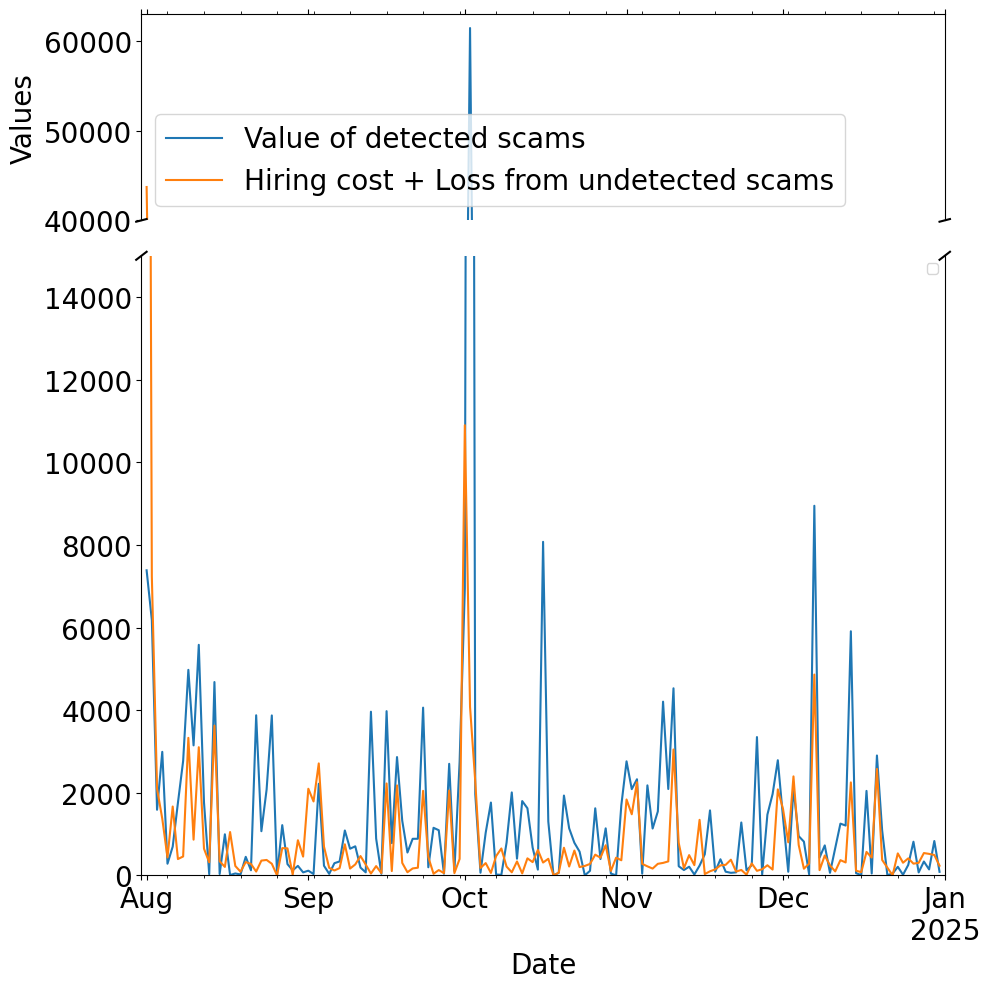

In [257]:

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True, gridspec_kw={'height_ratios': [10, 30]})

# First subplot. Zoomed-in y-axis
bayes_average.plot(x="Date", y=["Value of detected scams", "Hiring cost + Loss from undetected scams"], ax=axes[0], label=["Value of detected scams", "Hiring cost + Loss from undetected scams"])
axes[0].set_ylabel("")
axes[0].set_ylim(40000, 63000) 
axes[0].yaxis.set_major_locator(MultipleLocator(10000))  # Set y-axis ticks at intervals of 2000
axes[0].legend()

# Plotting the second subplot. Zoomed-in y-axis
bayes_average.plot(x="Date", y=["Value of detected scams", "Hiring cost + Loss from undetected scams"], ax=axes[1], label=["Value of detected scams", "Hiring cost + Loss from undetected scams"])
axes[1].set_xlabel("Date")
axes[0].set_ylabel("Values")
axes[1].set_ylim(0, 15000)  # Adjust the limits as needed for your data
axes[1].legend([])  # Provide an empty list to remove the legend

# Hide spines and ticks in the second subplot
axes[0].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[0].xaxis.tick_top()
axes[0].tick_params(labeltop=False)  # Don't put tick labels at the top
axes[1].xaxis.tick_bottom()

# Set font size for various elements
font_size = 20  # Adjust the font size as needed
for ax in axes:
    ax.tick_params(axis='both', labelsize=font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize=font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize=font_size)

axes[0].legend(fontsize=font_size)

# Add diagonal lines to indicate the break between subplots
d = .0065  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=axes[0].transAxes, color='k', clip_on=False)
axes[0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
axes[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=axes[1].transAxes)  # switch to the bottom axes
axes[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
axes[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

axes[1].set_xlim(pd.to_datetime('2024-07-31'), pd.to_datetime('2025-01-01'))
axes[0].set_xlim(pd.to_datetime('2024-07-31'), pd.to_datetime('2025-01-01'))

# Show the plot
plt.tight_layout()
plt.savefig("3out Day-by-day, No False Negatives.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [247]:
import math
total_saved_mean = 1/5*(sum(bayes["Value of detected scams"]) + sum(bayes2["Value of detected scams"]) + sum(bayes3["Value of detected scams"]) + sum(bayes4["Value of detected scams"]) + sum(bayes5["Value of detected scams"]))
total_saved_var = 1/5 *(sum(bayes["Value of detected scams"])**2 + sum(bayes2["Value of detected scams"])**2 + sum(bayes3["Value of detected scams"])**2 + sum(bayes4["Value of detected scams"])**2 + sum(bayes5["Value of detected scams"])**2) - total_saved_mean**2
total_lost_mean = 1/5*(sum(bayes["Hiring cost + Loss from undetected scams"]) + sum(bayes2["Hiring cost + Loss from undetected scams"]) + sum(bayes3["Hiring cost + Loss from undetected scams"]) + sum(bayes4["Hiring cost + Loss from undetected scams"]) + sum(bayes5["Hiring cost + Loss from undetected scams"]))
total_lost_var = 1/5 * (sum(bayes["Hiring cost + Loss from undetected scams"])**2 + sum(bayes2["Hiring cost + Loss from undetected scams"])**2 + sum(bayes3["Hiring cost + Loss from undetected scams"])**2 + sum(bayes4["Hiring cost + Loss from undetected scams"])**2 + sum(bayes5["Hiring cost + Loss from undetected scams"])**2) - total_lost_mean**2

hiring_cost_1 = sum(bayes["Value of detected scams"]) + sum(bayes["Hiring cost + Loss from undetected scams"]) - 350328.25
hiring_cost_2 = sum(bayes2["Value of detected scams"]) + sum(bayes2["Hiring cost + Loss from undetected scams"]) - 350328.25
hiring_cost_3 = sum(bayes3["Value of detected scams"]) + sum(bayes3["Hiring cost + Loss from undetected scams"]) - 350328.25
hiring_cost_4 = sum(bayes4["Value of detected scams"]) + sum(bayes4["Hiring cost + Loss from undetected scams"]) - 350328.25
hiring_cost_5 = sum(bayes5["Value of detected scams"]) + sum(bayes5["Hiring cost + Loss from undetected scams"]) - 350328.25

row1 = [total_saved_mean, total_lost_mean]
row15 = [math.sqrt(total_saved_var), math.sqrt(total_lost_var)]
row2 = [total_saved_mean/(total_saved_mean + total_lost_mean)*100, total_lost_mean/(total_saved_mean+total_lost_mean)*100]
saved_prop = pd.DataFrame([row1, row15, row2])
saved_prop.iloc[0] = saved_prop.iloc[0].apply(lambda x: "£{:.2f}".format(x))
saved_prop.iloc[1] = saved_prop.iloc[1].apply(lambda x: "£{:.2f}".format(x))
saved_prop.iloc[2] = saved_prop.iloc[2].apply(lambda x: "{:.2f}\%".format(x))
saved_prop["Index"] = ["Mean £", "Std Deviation", "Mean Proportion"]
saved_prop = saved_prop.set_index("Index")
saved_prop.index.name = None
saved_prop.columns = ["Money saved", "Money spent"]
display(saved_prop)
print(saved_prop.to_latex())

,Money saved,Money spent
Mean £,£263188.02,£162580.23
Std Deviation,£42172.92,£54565.05
Mean Proportion,61.81\%,38.19\%


\begin{tabular}{lll}
\toprule
 & Money saved & Money spent \\
\midrule
Mean £ & £263188.02 & £162580.23 \\
Std Deviation & £42172.92 & £54565.05 \\
Mean Proportion & 61.81\% & 38.19\% \\
\bottomrule
\end{tabular}



In [339]:
A = 1 - sum(bayes["Hiring cost + Loss from undetected scams"])/350328.25
B = 1 - sum(bayes2["Hiring cost + Loss from undetected scams"])/350328.25
C = 1 - sum(bayes3["Hiring cost + Loss from undetected scams"])/350328.25
D = 1 - sum(bayes4["Hiring cost + Loss from undetected scams"])/350328.25
E = 1 - sum(bayes5["Hiring cost + Loss from undetected scams"])/350328.25

In [340]:
total_saved = sum(bayes_average["Value of detected scams"])
total_lost = sum(bayes_average["Hiring cost + Loss from undetected scams"])
row2 = [350328.25, 0]
value = [total_saved, math.sqrt(total_saved_var)]
row15 = [total_lost + total_saved - 350328.25, np.std([hiring_cost_1, hiring_cost_2, hiring_cost_3, hiring_cost_4, hiring_cost_5])]
row18 = [total_lost, math.sqrt(total_lost_var)]


losses_cut = [1 - total_lost/350328.25, np.std([A,B,C,D,E])]
saved_prop = pd.DataFrame([row2, value, row15, row18,  losses_cut])
saved_prop.iloc[0] = saved_prop.iloc[0].apply(lambda x: "- £{:.2f}".format(x))
saved_prop.iloc[1] = saved_prop.iloc[1].apply(lambda x: "+ £{:.2f}".format(x))
saved_prop.iloc[2] = saved_prop.iloc[2].apply(lambda x: "- £{:.2f}".format(x))
saved_prop.iloc[3] = saved_prop.iloc[3].apply(lambda x: "- £{:.2f}".format(x))
saved_prop.iloc[4] = saved_prop.iloc[4].apply(lambda x: "{:.2f}\%".format(x * 100))
saved_prop["Index"] = ["Theoretical Max loss (no investigations)", "Our Detected Scams", "Hiring cost", "Total" , "Proportion of Losses cut"]
saved_prop = saved_prop.set_index("Index")
saved_prop.index.name = None
saved_prop.columns = ["Average", "Std. Deviation"]
display(saved_prop)
print(saved_prop.to_latex())

,Average,Std. Deviation
Theoretical Max loss (no investigations),- £350328.25,- £0.00
Our Detected Scams,+ £263188.02,+ £42172.92
Hiring cost,- £75440.00,- £12963.59
Total,- £162580.23,- £54565.05
Proportion of Losses cut,53.59\%,15.58\%


\begin{tabular}{lll}
\toprule
 & Average & Std. Deviation \\
\midrule
Theoretical Max loss (no investigations) & - £350328.25 & - £0.00 \\
Our Detected Scams & + £263188.02 & + £42172.92 \\
Hiring cost & - £75440.00 & - £12963.59 \\
Total & - £162580.23 & - £54565.05 \\
Proportion of Losses cut & 53.59\% & 15.58\% \\
\bottomrule
\end{tabular}



In [164]:
bayes_average

,Value of detected scams,loss_value_scams,Hiring cost + Loss from undetected scams,prio1_det,prio2_det,prio3_det,prio4_det,prio1_undet,prio2_undet,prio3_undet,...,bank_C_loss_scams,bank_D_loss_scams,bank_E_loss_scams,bank_A_loss_scams_ext,bank_B_loss_scams_ext,bank_C_loss_scams_ext,bank_D_loss_scams_ext,bank_E_loss_scams_ext,Date,test_day
0,6762.56,5806.14,55962.14,2.4,2.0,4.8,0.4,3.6,2.0,1.2,...,73.20,0.00,357.19,10383.21,16324.54,9563.20,9574.00,10117.19,2024-08-01,305.0
1,6162.82,633.58,3737.58,2.6,1.0,2.0,2.0,5.4,0.0,1.0,...,47.45,41.55,136.10,939.55,570.93,687.45,561.55,978.10,2024-08-02,306.0
2,1582.77,814.28,2368.28,0.8,0.4,0.0,1.0,6.2,1.6,1.0,...,81.76,187.74,91.33,397.10,724.35,351.76,583.74,311.33,2024-08-03,307.0
3,3007.95,513.20,1243.20,0.6,0.2,2.4,0.0,5.4,1.8,0.6,...,0.00,150.85,266.59,260.00,195.76,180.00,270.85,336.59,2024-08-04,308.0
4,467.63,135.47,305.47,1.4,1.8,0.0,0.8,2.6,0.2,0.0,...,0.00,89.35,0.00,66.12,0.00,0.00,109.35,130.00,2024-08-05,309.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,813.67,282.73,282.73,1.6,0.0,0.0,1.0,3.4,0.0,1.0,...,0.00,0.00,0.00,238.55,44.18,0.00,0.00,0.00,2024-12-26,452.0
148,21.06,351.19,351.19,0.4,0.0,0.0,0.0,4.6,0.0,1.0,...,0.00,0.00,217.70,36.25,97.24,0.00,0.00,217.70,2024-12-27,453.0
149,340.57,533.08,533.08,5.6,0.8,0.0,0.0,1.4,2.2,1.0,...,0.00,96.56,60.41,85.12,290.99,0.00,96.56,60.41,2024-12-28,454.0
150,187.36,474.34,474.34,1.0,0.0,0.6,0.0,1.0,1.0,1.4,...,0.00,35.80,140.96,297.58,0.00,0.00,35.80,140.96,2024-12-29,455.0


In [181]:
counts = bayes_average.iloc[:,3:11].sum(axis=0)
diction_rate = {"Transaction Priority": [1,2,3,4],
                "Investigation Success Rate": [counts[0]/(counts[0] + counts[4]), 
                                               counts[1]/(counts[1] + counts[5]), 
                                               counts[2]/(counts[2] + counts[6]),
                                               counts[3]/(counts[3] + counts[7])]}
success_rate_df = pd.DataFrame.from_dict(diction_rate)
success_rate_df["Investigation Success Rate"] = success_rate_df["Investigation Success Rate"].apply(lambda x: "{:.2f}\%".format(x * 100))
display(success_rate_df)
print(success_rate_df.to_latex(index = False))

,Transaction Priority,Investigation Success Rate
0,1,38.81\%
1,2,19.81\%
2,3,60.34\%
3,4,56.18\%


\begin{tabular}{rl}
\toprule
Transaction Priority & Investigation Success Rate \\
\midrule
1 & 38.81\% \\
2 & 19.81\% \\
3 & 60.34\% \\
4 & 56.18\% \\
\bottomrule
\end{tabular}



In [182]:
more_counts = bayes_average.iloc[:,11:19].sum(axis=0)
false_positive_counts = sum(more_counts[0:4])
true_negative_counts = sum(more_counts[4:8])
true_positive_counts = sum(counts[0:4])
false_negative_counts = sum(counts[4:8])

table = pd.DataFrame([[true_positive_counts, false_positive_counts], [false_negative_counts, true_negative_counts]], columns= ["Fraud", "Not Fraud"])
table["Total"] = table.sum(axis=1)
table.loc[len(table)] = table.sum(axis=0)
table["Index"] = np.array(["Mean Investigated", "Mean Not investigated", "Total"])
table = table.set_index("Index")
table.index.name = None
display(table)
print(table.to_latex())

,Fraud,Not Fraud,Total
Mean Investigated,432.6,14471.0,14903.6
Mean Not investigated,573.4,108046.0,108619.4
Total,1006.0,122517.0,123523.0


\begin{tabular}{lrrr}
\toprule
 & Fraud & Not Fraud & Total \\
\midrule
Mean Investigated & 432.600000 & 14471.000000 & 14903.600000 \\
Mean Not investigated & 573.400000 & 108046.000000 & 108619.400000 \\
Total & 1006.000000 & 122517.000000 & 123523.000000 \\
\bottomrule
\end{tabular}



## Model 1 (Nico's model)

In [341]:
nico = pd.read_csv('final_result.csv', delimiter =";")
nico2 = pd.read_csv('final31.csv', delimiter = ";")
nico = pd.concat([nico, nico2], ignore_index=True)
nico.to_csv("concat.csv", sep = ";")
print(sum(nico.loc[nico["is_scam_transaction"] == 1, "Amount"])) # Total scam amount. 350328.25


total_saved = sum(nico.loc[(nico["is_scam_transaction"] == 1) & (nico["chosen"] == 1), "Amount"])
scam_lost = sum(nico.loc[(nico["chosen"] == 0) & (nico["is_scam_transaction"] == 1), "Amount"])
hiring = sum(nico.loc[(nico["ext_investigator"] == 1) & (nico["chosen"] == 1), "cash_inv"])
print(total_saved, scam_lost, hiring)


350328.25000000093
314369.50000000035 35958.75000000002 50950.0


In [318]:
total_lost = scam_lost + hiring

value = total_saved
row15 = hiring
row18 = total_lost

row2 = 350328.25
losses_cut = 1 - total_lost/350328.25
saved_prop = pd.DataFrame([row2, value, row15, row18,  losses_cut])
saved_prop.iloc[0] = saved_prop.iloc[0].apply(lambda x: "- £{:.2f}".format(x))
saved_prop.iloc[1] = saved_prop.iloc[1].apply(lambda x: "+ £{:.2f}".format(x))
saved_prop.iloc[2] = saved_prop.iloc[2].apply(lambda x: "- £{:.2f}".format(x))
saved_prop.iloc[3] = saved_prop.iloc[3].apply(lambda x: "- £{:.2f}".format(x))
saved_prop.iloc[4] = saved_prop.iloc[4].apply(lambda x: "{:.2f}\%".format(x * 100))
saved_prop["Index"] = ["Theoretical Max loss (no investigations)", "Our Detected Scams", "Hiring cost", "Total" , "Proportion of Losses cut"]
saved_prop = saved_prop.set_index("Index")
saved_prop.index.name = None
saved_prop.columns = ["Loss"]
display(saved_prop)
print(saved_prop.to_latex())

,Loss
Theoretical Max loss (no investigations),- £350328.25
Our Detected Scams,+ £314369.50
Hiring cost,- £50950.00
Total,- £86908.75
Proportion of Losses cut,75.19\%


\begin{tabular}{ll}
\toprule
 & Loss \\
\midrule
Theoretical Max loss (no investigations) & - £350328.25 \\
Our Detected Scams & + £314369.50 \\
Hiring cost & - £50950.00 \\
Total & - £86908.75 \\
Proportion of Losses cut & 75.19\% \\
\bottomrule
\end{tabular}



In [331]:
p1_succ = np.shape(nico[(nico["is_scam_transaction"] == 1) & (nico["priority"] == 1) & (nico["chosen"] == 1)])[0] / np.shape(nico[(nico["is_scam_transaction"] == 1) & (nico["priority"] == 1)])[0]
p2_succ = np.shape(nico[(nico["is_scam_transaction"] == 1) & (nico["priority"] == 2) & (nico["chosen"] == 1)])[0] / np.shape(nico[(nico["is_scam_transaction"] == 1) & (nico["priority"] == 2)])[0]
p3_succ = np.shape(nico[(nico["is_scam_transaction"] == 1) & (nico["priority"] == 3) & (nico["chosen"] == 1)])[0] / np.shape(nico[(nico["is_scam_transaction"] == 1) & (nico["priority"] == 3)])[0]
p4_succ = np.shape(nico[(nico["is_scam_transaction"] == 1) & (nico["priority"] == 4) & (nico["chosen"] == 1)])[0] / np.shape(nico[(nico["is_scam_transaction"] == 1) & (nico["priority"] == 4)])[0]

diction_rate = {"Transaction Priority": [1,2,3,4],
                "Investigation Success Rate": [p1_succ,
                                               p2_succ,
                                               p3_succ,
                                               p4_succ]}
success_rate_df = pd.DataFrame.from_dict(diction_rate)
success_rate_df["Investigation Success Rate"] = success_rate_df["Investigation Success Rate"].apply(lambda x: "{:.2f}\%".format(x * 100))
display(success_rate_df)
print(success_rate_df.to_latex(index = False))

,Transaction Priority,Investigation Success Rate
0,1,48.92\%
1,2,39.81\%
2,3,75.00\%
3,4,69.12\%


\begin{tabular}{rl}
\toprule
Transaction Priority & Investigation Success Rate \\
\midrule
1 & 48.92\% \\
2 & 39.81\% \\
3 & 75.00\% \\
4 & 69.12\% \\
\bottomrule
\end{tabular}

